In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [2]:
preprocessor_url = "https://kaggle.com/models/tensorflow/bert/TensorFlow2/en-uncased-preprocess/3"
encoder_url = "https://www.kaggle.com/models/tensorflow/bert/TensorFlow2/en-uncased-l-12-h-768-a-12/4"

In [3]:
import pandas as pd
df = pd.read_csv("email.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df['Category'].value_counts()

# IMBALANCE DETECTED

Category
ham               4825
spam               747
{"mode":"full"       1
Name: count, dtype: int64

In [5]:
# down_up_sample_size = 1000

# PLANNING TO UPSAMPLE SPAM A LITTLE BIT AND DOWNSAMPLE HAM

In [6]:
# from imblearn.over_sampling import SMOTE

ham_df = df[df['Category'] == 'ham']
spam_df = df[df['Category'] == 'spam']

ham_samp = ham_df.sample(n=df['Category'].value_counts()[1], random_state=42)
print("DOWN SAMPLED HAM : ",ham_samp.shape, end="\n\n")

# ndf = pd.concat((ham_samp,spam_df), axis=0)

# x = ndf.drop(columns="Category")
# y = ndf["Category"]

# smote = SMOTE(sampling_strategy={'spam': 1000}, random_state=42)

# x_smote, y_smote = smote.fit_resample(x, y)

# print("Class Distribution After SMOTE:\n", y_smote.value_counts())
# print("AFTER SAMPLING: ", x_smote.shape, end="\n\n")

nrdf = pd.concat((ham_samp,spam_df),axis=0)

DOWN SAMPLED HAM :  (747, 2)



C:\Users\Anandhu\AppData\Local\Temp\ipykernel_14300\3961491637.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ham_samp = ham_df.sample(n=df['Category'].value_counts()[1], random_state=42)


In [7]:
nrdf.shape
nrdf.reset_index(drop=True,inplace=True)
nrdf

,Category,Message
0,ham,If i not meeting ü all rite then i'll go home ...
1,ham,"I.ll always be there, even if its just in spir..."
2,ham,"Sorry that took so long, omw now"
3,ham,I thk 50 shd be ok he said plus minus 10.. Did...
4,ham,Dunno i juz askin cos i got a card got 20% off...
...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [8]:
nrdf['spam'] = nrdf['Category'].apply(lambda x: 1 if x=="spam" else 0)
nrdf

,Category,Message,spam
0,ham,If i not meeting ü all rite then i'll go home ...,0
1,ham,"I.ll always be there, even if its just in spir...",0
2,ham,"Sorry that took so long, omw now",0
3,ham,I thk 50 shd be ok he said plus minus 10.. Did...,0
4,ham,Dunno i juz askin cos i got a card got 20% off...,0
...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,1
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,1
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,1


In [9]:
from sklearn.model_selection import train_test_split

x = nrdf['Message']
y = nrdf['spam']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify=y)

In [10]:
bert_preprocessor = hub.KerasLayer(preprocessor_url)
bert_model = hub.KerasLayer(encoder_url)

In [11]:
def get_sentence_embeding(sent):
    text_process = bert_preprocessor(sent)
    return bert_model(text_process)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up", 
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.843517  , -0.5132726 , -0.8884572 , ..., -0.74748856,
        -0.7531473 ,  0.91964483],
       [-0.8720835 , -0.50543964, -0.94446677, ..., -0.8584752 ,
        -0.7174535 ,  0.8808299 ]], dtype=float32)>

In [49]:
word_emb_ed = get_sentence_embeding([
    "elephant", 
    "australia",
    "america",
    "girraffe",
    "grape",
    "india"
]
)

# JUST DEFINED FOR RETURNING THE NAME IN THE BELOW FUNCTION
word_embed_label = [ "elephant", "australia","america","girraffe","grape","india"]

word_emb_ed

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.8730652 , -0.33146092,  0.16977945, ...,  0.24551818,
        -0.5866142 ,  0.88194287],
       [-0.88194925, -0.27421173,  0.02269693, ...,  0.13067822,
        -0.62093174,  0.8629443 ],
       [-0.87140787, -0.2613149 ,  0.24596833, ...,  0.23648252,
        -0.5967673 ,  0.8534443 ],
       [-0.8782035 , -0.25188845, -0.09536216, ...,  0.18167253,
        -0.59779644,  0.8711839 ],
       [-0.8540849 , -0.17408368,  0.23000976, ...,  0.22893879,
        -0.55810857,  0.85165477],
       [-0.94426244, -0.39026305, -0.28032622, ..., -0.13074909,
        -0.69187725,  0.9182145 ]], dtype=float32)>

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

def return_cosine_sim(w1,w2):
    return cosine_similarity([word_emb_ed[w1]],[word_emb_ed[w2]])[0][0], word_embed_label[w1], word_embed_label[w2]
    # EXPECTS A TWO DIMENSIONAL ARRAY

return_cosine_sim(1,2)


(0.9893999, 'australia', 'america')

In [27]:
return_cosine_sim(1,3)

(0.99101883, 'australia', 'girraffe')

In [28]:
return_cosine_sim(1,4)

# HERE THERE ARE UNEXPECTED SIMILARITIES AS WHEN THEY TRAIN ON WIKEPIDEA TEXT, CONTEXT MATTERS. HERE WE ARE SIMPLY GIVING THE WORDS 

(0.9857625, 'australia', 'grape')

In [ ]:
# FUNCTIONAL TENSORFLOW MODEL RATHER THAN SEQUENTIAL 


# import keras

# text_input = keras.layers.Input(shape=(),dtype=tf.string,name="texter")
# preprocessed_text = bert_preprocessor(text_input)
# outputs = bert_model(preprocessed_text)
# dr = keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
# keras.layers.Dense(1,activation="sigmoid",name="output")(dr)

# keras.Model(inputs = [text_input], outputs = [1])
# ERROR ABOVE CODE SEGMENT




# text_input = tf.keras.layers.Input(shape=(),dtype=tf.string,name="texter")
# preprocessed_text = bert_preprocessor(text_input)
# outputs = bert_model(preprocessed_text)
# dr = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
# tf.keras.layers.Dense(1,activation="sigmoid",name="output")(dr)

# tf.keras.Model(inputs = [text_input], outputs = [1])
# ERROR ABOVE CODE SEGMENT




# import tf_keras
# text_input = tf_keras.layers.Input(shape=(),dtype=tf.string,name="texter")
# preprocessed_text = bert_preprocessor(text_input)
# outputs = bert_model(preprocessed_text)
# dr = tf_keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
# tf_keras.layers.Dense(1,activation="sigmoid",name="output")(dr)

# tf_keras.Model(inputs = [text_input], outputs = [1])
# ERROR ABOVE CODE SEGMENT




from keras import layers, Model, metrics

text_input = layers.Input(shape=(), dtype=tf.string, name="texter")
preprocessed_text = bert_preprocessor(text_input)
output = bert_model(preprocessed_text)
dr = layers.Dropout(0.1, name="dropout")(output['pooled_output'])
final_output = layers.Dense(1, activation="sigmoid", name="output")(dr)
model = Model(inputs=[text_input], outputs=[final_output])
model.summary()


# from tensorflow.keras import Sequential, layers

# model = Sequential([
#     layers.Input(shape=(), dtype=tf.string, name="texter"),  # Input Layer
#     layers.Lambda(lambda x: bert_preprocessor(x), name="preprocessor"),  # Preprocessing (via Lambda layer)
#     layers.Lambda(lambda x: bert_model(x)['pooled_output'], name="bert_model"),  # BERT Model
#     layers.Dropout(0.1, name="dropout"),  # Dropout Layer
#     layers.Dense(1, activation="sigmoid", name="output"),  # Output Layer
# ])
# DEMONSTRATION FOR HOW SEQUENTIAL FAILS FOR MULTI OUTPUT MODELS LIKE BERT

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 texter (InputLayer)            [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['texter[0][0]']                 
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                               

In [51]:
METRICS = [
    metrics.BinaryAccuracy(name="accuracy"),
    metrics.Precision(name="precision"),
    metrics.Recall(name="recall")
]

model.compile(
    optimizer="adam",
    loss='binary_crossentropy',
    metrics=METRICS
)

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
35/35 [==============================] - 204s 6s/step - loss: 0.6130 - accuracy: 0.7000 - precision: 0.7179 - recall: 0.6589
Epoch 2/10
35/35 [==============================] - 219s 6s/step - loss: 0.5016 - accuracy: 0.8196 - precision: 0.8034 - recall: 0.8464
Epoch 3/10
35/35 [==============================] - 285s 8s/step - loss: 0.4372 - accuracy: 0.8536 - precision: 0.8462 - recall: 0.8643
Epoch 4/10
35/35 [==============================] - 193s 6s/step - loss: 0.3938 - accuracy: 0.8661 - precision: 0.8596 - recall: 0.8750
Epoch 5/10
35/35 [==============================] - 1565s 46s/step - loss: 0.3580 - accuracy: 0.8857 - precision: 0.8763 - recall: 0.8982
Epoch 6/10
35/35 [==============================] - 219s 6s/step - loss: 0.3446 - accuracy: 0.8813 - precision: 0.8739 - recall: 0.8911
Epoch 7/10
35/35 [==============================] - 210s 6s/step - loss: 0.3188 - accuracy: 0.9036 - precision: 0.8924 - recall: 0.9179
Epoch 8/10
35/35 [============================

In [52]:
model.save("my_email_spam_classifier")

INFO:tensorflow:Assets written to: my_email_spam_classifier\assets


INFO:tensorflow:Assets written to: my_email_spam_classifier\assets


In [55]:
from sklearn.metrics import classification_report
import numpy as np

y_predicted = model.predict(x_test)
y_predicted = np.where(y_predicted>0.5,1,0)

12/12 [==============================] - 67s 6s/step


              precision    recall  f1-score   support

           0       0.95      0.87      0.91       187
           1       0.88      0.96      0.92       187

    accuracy                           0.91       374
   macro avg       0.92      0.91      0.91       374
weighted avg       0.92      0.91      0.91       374



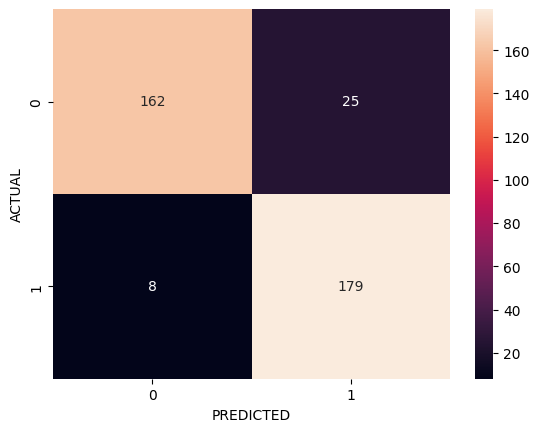

In [57]:
import seaborn as sn
import matplotlib.pyplot as plt

c_report = classification_report(y_test,y_predicted)

c_matrix = tf.math.confusion_matrix(y_test,y_predicted)
sn.heatmap(c_matrix,annot=True,fmt="d")
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")

print(c_report)

In [59]:
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your .",
    "New Badge Received. Congratulations, you've received 2 Years on Kaggle badge",
    "Did you know that most jobs get filled by referral? Share your resume online and let everybody know that you're open to new job offers."
]
model.predict(reviews)

1/1 [==============================] - 1s 1s/step


array([[0.73905975],
       [0.8506702 ],
       [0.8078605 ],
       [0.20965324],
       [0.11544293],
       [0.51945525],
       [0.16804007]], dtype=float32)